In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df = pd.read_csv('../Data Collection/Datasets/alonhadat.com/raw/alonhadat.csv')
# Select only the specific columns you're interested in
selected_columns = [
    'url', 'title', 'description', 'price', 'area', 'address', 
    'Mã tin', 'Loại tin', 'Loại BDS', 'Pháp lý', 
    'Số lầu', 'Số phòng ngủ'
]

# Create a new dataframe with only the selected columns
df_selected = df[selected_columns].copy()

# Check the shape of the new dataframe
print(f"Original dataframe shape: {df.shape}")
print(f"Selected dataframe shape: {df_selected.shape}")

# Display the first few rows of the selected dataframe
df_selected.head()

Original dataframe shape: (12000, 22)
Selected dataframe shape: (12000, 12)


,url,title,description,price,area,address,Mã tin,Loại tin,Loại BDS,Pháp lý,Số lầu,Số phòng ngủ
0,https://alonhadat.com.vn/ban-nha-le-trong-tan-...,"Bán nhà Lẻ Trọng Tấn-Hd 40m²,4 tầng chỉ hơn 5 ...","Cần bán nhà Lê Trọng Tấn,Hà đông\n+Vị trí đẹp,...","5,95 tỷ",40 m2,"Đường Lê Trọng Tấn, Phường La Khê, Quận Hà Đôn...",13527842.00,Cần bán,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4,3
1,https://alonhadat.com.vn/ban-can-cc-83m-3-ngu-...,"Bán căn cc 83m²,3 ngủ,nội thất đẹp chỉ nhỉnh 2...",-Gia đình chủ cần bán gấp căn hộ chung cư cao ...,"2,45 tỷ",83 m2,"Đường Lê Trọng Tấn, Phường Dương Nội, Quận Hà ...",13528197.00,Cần bán,Căn hộ chung cư,Sổ hồng/ Sổ đỏ,35,3
2,https://alonhadat.com.vn/ban-nha-pho-ao-sen-hd...,"Ban nhà phố Ao sen-Hd 40m²,5 tầng nhỉnh 10 tỷ ...",Cần bán nhà phố Ao sen-Hà đông\n-Vị trí đắc đị...,"10,45 tỷ",40 m2,"Đường Ao Sen, Phường Mộ Lao, Quận Hà Đông, Hà Nội",13527566.00,Cần bán,Nhà mặt tiền,---,5,3
3,https://alonhadat.com.vn/ban-nha-xa-la-hd-40m-...,"Bán nhà Xa la-Hd 40m²4 tầng Ô tô đỗ cửa,kinh d...","Bán gấp nhà xóm chùa Xa la,Hà đông.Nhà gần việ...","4,9 tỷ",40 m2,"Phố Xa La, Phường Kiến Hưng, Quận Hà Đông, Hà Nội",13526177.00,Cần bán,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4,4
4,https://alonhadat.com.vn/ban-nha-la-khe-hd-50m...,"Bán nhà La khê-Hd 50m²,6 tầng nhỉnh 7 tỷ P/lô,...","-Bán nhà khu Cổng đồng La khê,Hà đông.Vị trí đ...","7,45 tỷ",50 m2,"Đường Tố Hữu, Phường La Khê, Quận Hà Đông, Hà Nội",13524303.00,Cần bán,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,6,4


In [4]:
print(f"Dataset shape: {df.shape}")
print("\nData types:")
print(df.dtypes)
print("\nBasic information:")
df.info()

Dataset shape: (12000, 22)

Data types:
url                 object
title               object
description         object
price               object
area                object
address             object
Mã tin             float64
Hướng               object
Phòng ăn            object
Loại tin            object
Đường trước nhà     object
Nhà bếp             object
Loại BDS            object
Pháp lý             object
Sân thượng          object
Chiều ngang         object
Số lầu              object
Chổ để xe hơi       object
Chiều dài           object
Số phòng ngủ        object
Chính chủ           object
Thuoc du an         object
dtype: object

Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              12000 non-null  object 
 1   title            12000 non-null  object 
 2   description      11936 non-null  o

In [5]:
print("\nSummary statistics:")
df.describe()


Summary statistics:


,Mã tin
count,12000.00
mean,12300133.43
std,2145413.78
min,1647837.00
25%,12034105.00
50%,13312762.50
75%,13589455.00
max,13732489.00


In [6]:
# Check for missing values
print("\nMissing values count:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print(f"\nPercentage of missing values:\n{(df.isnull().sum() / len(df) * 100).round(2)[df.isnull().sum() > 0]}")



Missing values count:
description       64
Thuoc du an    11339
dtype: int64

Percentage of missing values:
description    0.53
Thuoc du an   94.49
dtype: float64


In [7]:
print("\nPrice examples:")
print(df['price'].head(10).to_list())


Price examples:
['5,95 tỷ', '2,45 tỷ', '10,45 tỷ', '4,9 tỷ', '7,45 tỷ', '12,3 tỷ', '4,95 tỷ', '11,3 tỷ', '9,15 tỷ', '10,95 tỷ']


# Data Cleaning and Type Conversion

In [8]:
def clean_price(price_str):
    """
    Properly handle different price formats in Vietnamese real estate listings
    Returns price in billions of VND
    """
    if pd.isna(price_str):
        return np.nan
    if isinstance(price_str, (int, float)):
        return price_str
    
    price_str = str(price_str).strip()
    
    # Check if price is per square meter
    per_m2 = False
    if '/ m2' in price_str or '/m2' in price_str:
        per_m2 = True
    
    # Handle Vietnamese number format - replace comma with period for decimal point
    price_str = price_str.replace(',', '.')
    
    # Extract the numeric part
    numeric_part = re.findall(r'\d+\.?\d*', price_str)
    if not numeric_part:
        return np.nan
    
    value = float(numeric_part[0])
    
    # Convert based on unit
    if 'tỷ' in price_str:
        # Already in billions
        result = value
    elif 'triệu' in price_str:
        # Convert millions to billions
        result = value / 1000
    else:
        # Assume the value is already in the correct unit
        result = value
    
    # If it's per square meter, add a flag or handle differently
    # You might want to store this in a separate column
    if per_m2:
        # Store the flag in another column
        return result, True
    else:
        return result, False
    
# Clean the area column
def clean_area(area_str):
    """
    Clean the area string and convert it to a float
    """
    if pd.isna(area_str):
        return np.nan
    if isinstance(area_str, (int, float)):
        return area_str
    
    area_str = str(area_str).strip()
    
    # Handle Vietnamese number format - replace comma with period for decimal point
    area_str = area_str.replace(',', '.')
    
    # Extract the numeric part
    numeric_part = re.findall(r'\d+\.?\d*', area_str)
    if not numeric_part:
        return np.nan
    
    value = float(numeric_part[0])
    
    # Check for unit
    if 'm2' in area_str or 'm2' in area_str:
        # Already in square meters
        return value
    elif 'ha' in area_str:
        # Convert hectares to square meters
        return value * 10000
    else:
        # Assume the value is already in the correct unit
        return value

In [9]:
# Apply the function to create both price and price_type columns
price_results = df['price'].apply(clean_price)
df['price_numeric'] = [result[0] if isinstance(result, tuple) else np.nan for result in price_results]
df['price_per_m2_flag'] = [result[1] if isinstance(result, tuple) else False for result in price_results]
# Clean the area column
df['area_numeric'] = df['area'].apply(clean_area)
# Clean the address column
df['Số lầu'] = pd.to_numeric(df['Số lầu'], errors='coerce')
df['Số phòng ngủ'] = pd.to_numeric(df['Số phòng ngủ'], errors='coerce')


In [10]:
# Check the converted numeric columns
print("\nSummary statistics for numeric columns:")
print(df[['price_numeric', 'area_numeric', 'Số lầu', 'Số phòng ngủ']].describe())


Summary statistics for numeric columns:
       price_numeric  area_numeric   Số lầu  Số phòng ngủ
count       11994.00      12000.00 11041.00      11079.00
mean           17.19         73.67     5.14          5.23
std            45.54         68.80     3.42          7.55
min             0.00          1.00     1.00          1.00
25%             4.00         40.00     4.00          3.00
50%             7.00         54.00     5.00          4.00
75%            15.00         80.00     5.00          5.00
max          1000.00        990.00    50.00        280.00


Missing values in each column:
               Missing Count  Missing Percent
Thuoc du an            11339            94.49
Số lầu                   959             7.99
Số phòng ngủ             921             7.68
description               64             0.53
price_numeric              6             0.05


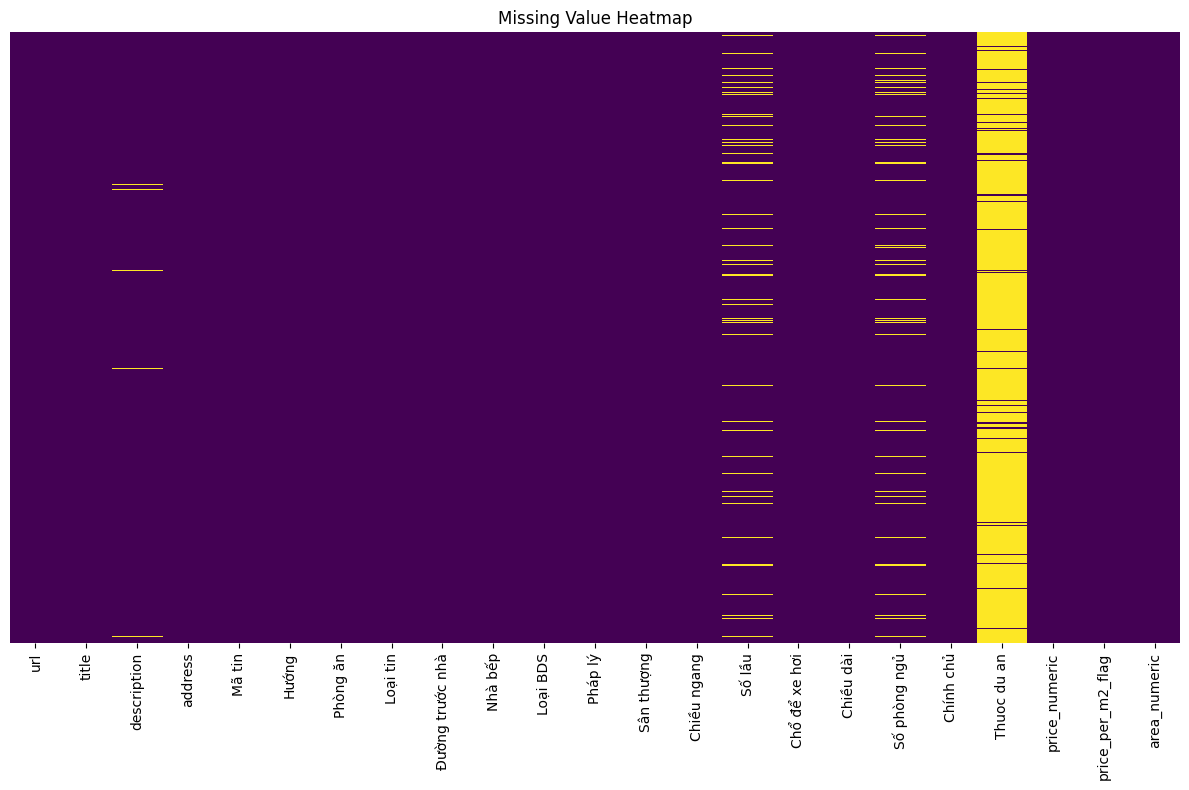


Number of duplicate rows: 6637
Number of duplicate 'Mã tin' values: 6640
Number of rows with duplicate values in ['address', 'area_numeric', 'price_numeric']: 9524

Examples of duplicate rows based on key columns:


KeyError: "['price', 'area'] not in index"

In [11]:
# Check for missing values
df = df.drop(columns=['price', 'area'])
print("Missing values in each column:")
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df) * 100).round(2)
missing_data = pd.DataFrame({'Missing Count': missing_values, 'Missing Percent': missing_percent})
print(missing_data[missing_data['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.tight_layout()
plt.show()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# Check for duplicate values in specific columns (e.g., 'Mã tin' which might be a unique identifier)
if 'Mã tin' in df.columns:
    duplicate_id = df['Mã tin'].duplicated().sum()
    print(f"Number of duplicate 'Mã tin' values: {duplicate_id}")

# Identify rows with duplicate values in key columns
key_columns = ['address', 'area_numeric', 'price_numeric']
duplicate_key_columns = df.duplicated(subset=key_columns, keep=False).sum()
print(f"Number of rows with duplicate values in {key_columns}: {duplicate_key_columns}")

# Display some examples of duplicate rows based on key columns
if duplicate_key_columns > 0:
    print("\nExamples of duplicate rows based on key columns:")
    duplicated_rows = df[df.duplicated(subset=key_columns, keep=False)].sort_values(by=key_columns)
    print(duplicated_rows[['price', 'area', 'address', 'price_numeric', 'area_numeric']].head(10))

# Check for columns with high percentage of missing values
high_missing = missing_data[missing_data['Missing Percent'] > 20]
if not high_missing.empty:
    print("\nColumns with more than 20% missing values:")
    print(high_missing)

# Calculate total missing values per row
df['missing_values_count'] = df.isnull().sum(axis=1)
print("\nMissing value counts per row:")
print(df['missing_values_count'].value_counts().sort_index())

# Remove the temporary column
df.drop('missing_values_count', axis=1, inplace=True)


In [ ]:
# Find the maximum value in price_numeric column
max_price = df['price_numeric'].max()
print(f"Maximum price value: {max_price}")

# Optionally, find the corresponding row(s) with this maximum value
max_price_rows = df[df['price_numeric'] == max_price]
print("\nDetails of property/properties with maximum price:")
print(max_price_rows)

In [ ]:
# Draw histogram for price data
plt.figure(figsize=(16, 10))

# Main price histograms
plt.subplot(2, 2, 1)
sns.histplot(df['price_numeric'].dropna(), kde=True, bins=50)
plt.title('Price Distribution (in billions VND)', fontsize=14)
plt.xlabel('Price (billions VND)')
plt.ylabel('Count')

# Log-transformed price for better visualization of skewed data
plt.subplot(2, 2, 2)
sns.histplot(np.log1p(df['price_numeric'].dropna()), kde=True, bins=50)
plt.title('Log-Transformed Price Distribution', fontsize=14)
plt.xlabel('Log(Price + 1)')
plt.ylabel('Count')

# Price by type (per m2 vs total)
plt.subplot(2, 2, 3)
sns.histplot(
    data=df[~df['price_per_m2_flag']], 
    x='price_numeric',
    label='Total Price',
    kde=True, 
    color='blue', 
    alpha=0.6,
    bins=50
)
plt.title('Price Distribution by Type', fontsize=14)
plt.xlabel('Price (billions VND)')
plt.ylabel('Count')
plt.legend()